# Joel Maki Python Assignment

In [2]:
##importing the various packages that may be needed for the assignment
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np

Fxns:

In [3]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)
##In this line of code we are creating a new function "get_sequences_from_file" that accepts fasta files 
##that will recognize "fasta_fn" as input. The second line is creating an empty dictionary called sequence_data_dict
##Next, we use  for loop with SeqIO.parse on "fasta_fn" and a format name that can be used by SeqIO.parse "fasta" 
##and returns a record ID (from http://biopython.org/wiki/SeqIO), then we are take the "description" of the record 
## and split the entire description string into seperate descriptions using the split() command 
##(from http://biopython.org/wiki/SeqIO). After splittng the description string into individual "descriptions"
## we are taking the second (description[1]) and third (description[2]) words from the fasta file, seperating them 
## with a space (" ") and defining that at the "species_name" that we then use as a key for the dictionary that was 
##created. Then we use the "species_name" we created in the previous line and using that as the key in the dictionary 
##that we created in line 2 and the entry being the nucleotide sequence (record.seq). This returns the final dictionary
##with all the "species_name"'s as keys and with the nucleotide sequences as the entries. 

In [14]:
def translate_function(string_nucleotides):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq_string =""
    for aa in range(0,int(len(string_nucleotides)),3):
        codon = string_nucleotides[aa:aa+3]
        if codon in mito_table.stop_codons:
            return aa_seq_string
        aa_seq_string=aa_seq_string+mito_table.forward_table[codon]
    return(aa_seq_string)
##In this script we are creating a function called "translate_function" which will take a string of nucleotides
##and sort it into an amino acid sequence.
##Here we create a for loop that will take every 3 nucleotides from the first position to the end of the input sequence 
##Lines 5-8 are part of the for loop where we are defining what that each codon is 3 nucleotides and
##that if the specific codon is found in the mitoTable.stop_codons
##(found on http://biopython.org/DIST/docs/tutorial/Tutorial.html), then it will return the aa_seq_string, which
##is then converted into a string of amino acids using the mito_table.forward_table[] command on each codon and adding
##it to the aa_seq_string
##The end result returns the aa_seq_string with the aa's for every 3 nucleotides
    

In [15]:
##testing the translate fxn by running the first species in "penguins_cytb.fasta" through
test = get_sequences_from_file("penguins_cytb.fasta")
test["Aptenodytes forsteri"]
aa_test = translate_function(str(test["Aptenodytes forsteri"]))
print(aa_test)

MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH


In [16]:
##Developing a better function for translating a string of nucleotides into a protein sequence
from Bio import Seq

def better_translate_fxn(string_nucleotides):
    aa_seq_string=Seq.translate(string_nucleotides, table=2, to_stop=True)
    return aa_seq_string
##(found on http://biopython.org/DIST/docs/api/Bio.Seq-pysrc.html)
##using the Seq package, there is a fxn that can automatically translate a string of nucleotides into an amino acid
##sequence. Here, we are creating a new function that can "better_translate_fxn" that accepts a string of nucleotides
##as an input. The translate() function in Seqs can accept a string of nucleotides and 
##translate it into an amino acid sequence, the table=2 option makes sure that the codon table that is being used
##is the same mitochondria table that was used in the other translation fxn, and the to_stop=True makes sure that 
##the translation is stopped at the first stop codon and that the stop codon is not incorporated into the final 
##translated sequence

In [18]:
##testing the "better" translation fxn
aa_test = better_translate_fxn(str(test["Aptenodytes forsteri"]))
print(aa_test)

MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH


In [21]:
##developing a function to calculate the molecular weight of an amino acid sequence
from Bio.SeqUtils.ProtParam import ProteinAnalysis
##first going to import the "ProteinAnalysis" package from "Bio.SeqUtils.ProtParam"
def compute_molecular_weight(aa_seq_string):
    analyzed_seq = ProteinAnalysis(aa_seq_string)
    mw = analyzed_seq.molecular_weight()
    return mw
##here we create a new fxn called "compute_molecular_weight", which can be used to calculate the molecular weight of
##the various amino acid sequences. We used the "ProteinAnalysis" fxn on the inputted aa string and put it into a 
##new variable called "analyzed_seq". The "analyzed_seq.molecular_weight()" fxn on analyzed_seq variable created in 
##the previous line and creating a variable mw, which contains the calculated molecular weight




In [20]:
##testing the mw fxn
mw_test = compute_molecular_weight(aa_test)
print(mw_test)

42459.602100000004


In [25]:
##GC content analysis fxn (adapted from the first python lecture)
def GC_content(string_nucleotides):
    GC_count = 0
    for base in string_nucleotides:
        if base is 'G' or base is 'C':
            GC_count += 1
    percent = GC_count / len(string_nucleotides)
    GC_content = percent*100 
    return GC_content


In [26]:
##testing the GC_count fxn
GC_test = GC_content(str(test["Aptenodytes forsteri"]))
print(GC_test)

48.38145231846019


Main

In [46]:
##importing the needed files
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 

penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

In [28]:
##Adding columns to the penguins data frame

penguins_df["mw"] = "NaN"
penguins_df["GC_content"] = "NaN"

In [29]:
##checking to make sure the columns were added to the dataframe
penguins_df

,species,mass,mw,GC_content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


In [78]:
##Adding the molecular weight to the molecular weight
##I looked through the files and noticed that the fasta file is in the same order as the table, so I created a for loop
##that would apply the molecular weight/GC function sequentially down the the list and return the value in the proper
##row using the index value and count (kinda a brittle solution but hey, it works...)
##(https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_value.html)
from Bio.SeqUtils import GC
count= 0 
for key, value in cytb_seqs.items():
    species_seq = str(value)
    aa_seq = better_translate_fxn(species_seq)
    mw = compute_molecular_weight(aa_seq)
    penguins_df.set_value(count, "mw", mw)
    GC_cont = GC(species_seq)
    penguins_df.set_value(count, "GC_content", GC_cont)
    count = count + 1
    
##the GC function I created above keep producing an error that said " float is not callable" so I imported the GC 
##function from biopython and that seemed to work fine    

In [79]:
penguins_df
##checking to make sure the output is correct and the "mw" column has been filled in

,species,mass,mw,GC_content
0,Aptenodytes forsteri,28.00,42459.6021,48.381452
1,Aptenodytes patagonicus,13.40,42563.7067,49.693788
2,Eudyptes chrysocome,2.80,42475.5753,51.181102
3,Eudyptes chrysolophus,4.50,42445.5493,50.918635
4,Eudyptes sclateri,4.25,42475.5753,50.831146
5,Eudyptula minor,1.60,42491.6408,49.256343
6,Pygoscelis adeliae,4.60,42458.6140,49.081365
7,Pygoscelis antarctica,4.10,42404.5423,47.769029
8,Pygoscelis papua,6.10,42595.8759,47.156605
9,Spheniscus demersus,3.20,42431.5490,48.293963


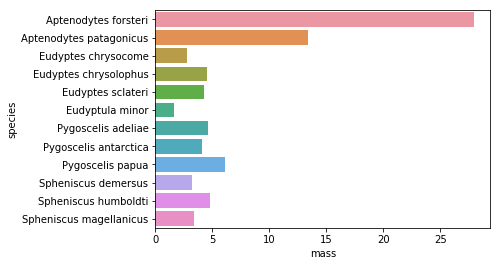

In [71]:
##creating a boxplot of the mass of the various penguin species
##set the barchart to a horizontal orientation because it made the names readable
##(https://seaborn.pydata.org/generated/seaborn.barplot.html)
sns.barplot(y = "species", x = "mass", data = penguins_df)

In [73]:
##The smallest penguin species is "Eudyptula minor"
##It is special because it is the smallest species of penguin AND because the creator of linux (Linus Torvalds) was
##bitten by a small penguin, which inspired him to make the mascot for Linux a penguin. 
##(https://en.wikipedia.org/wiki/Little_penguin)

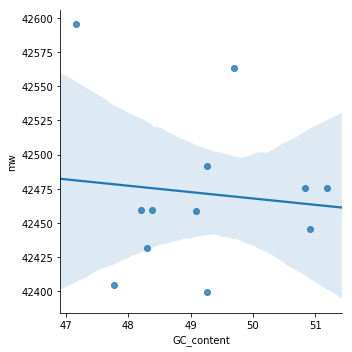

In [75]:
##Plotting the molecular weight as a function of the GC_content
sns.lmplot(y = "mw", x = "GC_content", data = penguins_df)

In [76]:
##Writing the new data frame to a csv
penguins_df.to_csv('Final_penguins_df.csv')

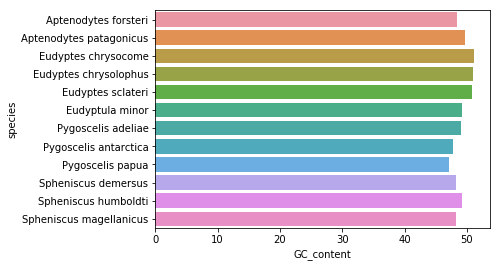

In [77]:
##BONUS
##Comparing the GC content between penguin species
sns.barplot(y = "species", x = "GC_content", data = penguins_df)